In [ ]:
# 📌 KNN 이란?
# k-nearest neighbors algorithm
# 👉 가장 가까운 K개의 이웃을 보고 결정하는 알고리즘
# 이름 그대로
# K (이웃 수)
# Nearest (가장 가까운)
# Neighbors (이웃들)

# 🔹 작동 원리
# 1️⃣ 새로운 데이터가 들어옴
# 2️⃣ 기존 데이터들과 거리 계산
# 3️⃣ 가장 가까운 K개 선택
# 4️⃣ 다수결(분류) 또는 평균(회귀)

# 📊 분류 예시
# K=3
# 가장 가까운 3개 중
# 2개가 1
# 1개가 0
# 👉 결과 = 1

# 🔹 핵심 파라미터
# 1️⃣ K 값 (n_neighbors)
# K 작으면 → 예민함 (과적합)
# K 크면 → 둔감함 (과소적합)
# 보통 홀수 사용 (동점 방지)
# 2️⃣ 거리 계산 방식
# 유클리디안 거리 (기본)
# 맨해튼 거리 등

# 🔹 장점 👍
# ✔ 개념 단순
# ✔ 구현 쉬움
# ✔ 데이터가 적으면 성능 좋음

# 🔹 단점 👎
# ❌ 데이터 많으면 느림 (거리 계산 많음)
# ❌ 스케일 영향 큼 → 반드시 정규화 필요
# ❌ 고차원 데이터에 약함

# 🔥 언제 쓰면 좋나?
# 데이터 적을 때
# 빠른 베이스라인 만들 때
# 복잡한 모델 쓰기 전 비교용

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("data/churn.csv")
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# 영어 컬럼명	한국어 뜻
# customerID	고객 ID
# gender	성별
# SeniorCitizen	노년층 여부 (고령자 여부)
# Partner	배우자 유무
# Dependents	부양가족 유무
# tenure	가입 기간 (개월 수)
# PhoneService	전화 서비스 이용 여부
# MultipleLines	다중 회선 사용 여부
# InternetService	인터넷 서비스 종류
# OnlineSecurity	온라인 보안 서비스
# OnlineBackup	온라인 백업 서비스
# DeviceProtection	기기 보호 서비스
# TechSupport	기술 지원 서비스
# StreamingTV	TV 스트리밍 서비스
# StreamingMovies	영화 스트리밍 서비스
# Contract	계약 유형
# PaperlessBilling	전자 청구서 여부
# PaymentMethod	결제 방식
# MonthlyCharges	월 요금
# TotalCharges	총 요금
# Churn	이탈 여부 (해지 여부)

In [ ]:
# 결측치(Missing value) 처리
# 전처리 - 스케일링(Scaling) 
# KNNClassifier 고객 이탈 예측 모델링
# GridsearchCV
# 중요 변수 파악

# 데이터 탐색

In [9]:
# 모든 컬럼 보기 (컬럼이 많아지면 헤드에서 ...으로 중간에 생략됨 그거까지 다 보이게 하는 함수)
pd.set_option('display.max_columns', 30)

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
# TotalCharges 를 수치화        '안녕 이런건 숫자로 바꿀 수 없다 -> 에러'
pd.to_numeric(df['TotalCharges'])

ValueError: Unable to parse string " " at position 488

In [ ]:
#iloc: 행,열 인덱스로 찾기
#loc: 행,열 이름으로 찾기

In [16]:
# 488 행 데이터 디버깅
df.loc[488, "TotalCharges"]

' '

In [17]:
# TotalCharges 데이터 중 공백 전부 제거
#✅ 의미👉 TotalCharges 컬럼에서👉 " " (공백 한 칸)을👉 "" (빈 문자열)로 바꾸는 것
df['TotalCharges'] = df['TotalCharges'].replace(" ", "")

In [19]:
# TotalCharges 를 수치화  
#다시 시도했을 떄 오류 안남
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
# 범주형 변수 별 카운트
cat_list = df.select_dtypes(include=['object']).columns.tolist()

for cat in cat_list:
    print(df[cat].value_counts())
    print("-------------------")

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
-------------------
gender
Male      3555
Female    3488
Name: count, dtype: int64
-------------------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
-------------------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
-------------------
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
-------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
-------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
-------------------
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
-------------------
OnlineBackup
No           

### 수치형 변수 파악

In [22]:
#df.describe() - 데이터의 기본 통계 요약 정보를 보여주는 함수
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
# 🎯 한 줄 정리
# SeniorCitizen → 노년층 여부
# tenure → 가입 기간
# MonthlyCharges → 월 요금
# TotalCharges → 총 납부 금액 👍

In [ ]:
#전처리하는 이유 ai 데이터습등하기 좋게 만드는것

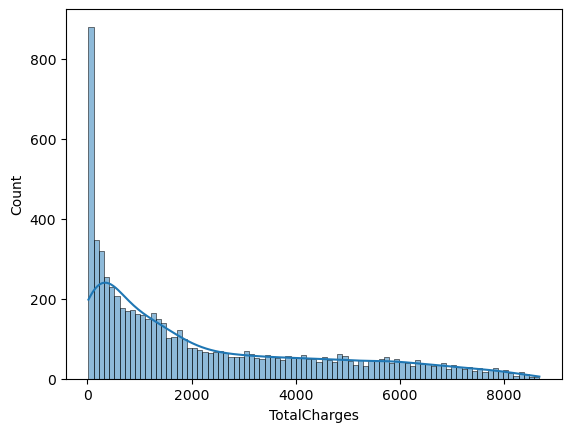

In [23]:
# TotalCharges 분포 확인 
sns.histplot(df, x='TotalCharges', kde=True, binwidth=100);
# Skewness(왜도/분포의 치우침 정도)가 크다. 스케일링 필요해 보임.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
#결측치
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [28]:
#TotalCharges 결측치 채우기 -> 중앙값(median)
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [29]:
df['TotalCharges'].isna().sum()

np.int64(0)

# Scaling

In [ ]:
# 스케일링(Scaling)이란?👉 데이터 값의 크기를 맞추는 것 단위가 다른 숫자들을 비슷한 범위로 조정하는 작업
# 🔹 왜 필요하냐?
# 예:나이: 20 ~ 60월요금: 20,000 ~ 100,000👉 값 차이가 너무 크면
# 거리 기반 모델(KNN, SVM 등)은 큰 숫자에 더 영향을 받음 ❌
# 그래서 스케일을 맞춰줘야 함.

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Min-max scaler

In [ ]:
# Min-max scaler
# # 데이터의 최솟값을 0, 최댓값을 1로 변환합니다 (0~1 사이).
# # 특징: 모든 데이터의 범위를 똑같이 맞출 때 유리하지만, 
# # 아주 큰 이상치가 하나라도 있으면 데이터가 0에 가깝게 뭉치는 현상이 발생할 수 있습니다.

In [33]:
#🔹 MinMaxScaler란?sklearn.preprocessing 안에 있는 스케일링 도구야.
minmax = MinMaxScaler()

In [34]:
df.drop(columns=['customerID'], inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [35]:
# 스케일링할 수치형 컬럼 리스트 정의
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# MinMaxScaler 객체 생성 및 학습
minmax = MinMaxScaler()

# '수치형 컬럼'들만 fit하고 변환
df[num_cols] = minmax.fit_transform(df[num_cols])
df[num_cols]

,tenure,MonthlyCharges,TotalCharges
0,0.013889,0.115423,0.001275
1,0.472222,0.385075,0.215867
2,0.027778,0.354229,0.010310
3,0.625000,0.239303,0.210241
4,0.027778,0.521891,0.015330
...,...,...,...
7038,0.333333,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.152778,0.112935,0.037809
7041,0.055556,0.558706,0.033210


### Standard Scaler

In [ ]:
# 데이터의 평균을 0, 표준편차를 1로 만듭니다.
# 특징: 이상치(Outlier)가 있는 경우에도 비교적 안정적입니다. 
# 데이터가 정규분포를 따를 때 효과적입니다.

In [ ]:
# 📊            차이            정리
# 구분	      Min-Max      	  Standard
# 범위	      0~1	          평균 0
# 이상치 영향	  큼	          상대적으로 적음
# 분포 형태	  그대로 유지     정규화 형태
# 자주 쓰는 곳  딥러닝	      일반 ML 모델

In [37]:
standard = StandardScaler()

# '수치형 컬럼'들만 fit하고 변환
df[num_cols] = standard.fit_transform(df[num_cols])
df[num_cols]

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994242
1,0.066327,-0.259629,-0.173244
2,-1.236724,-0.362660,-0.959674
3,0.514251,-0.746535,-0.194766
4,-1.236724,0.197365,-0.940470
...,...,...,...
7038,-0.340876,0.665992,-0.128655
7039,1.613701,1.277533,2.243151
7040,-0.870241,-1.168632,-0.854469
7041,-1.155283,0.320338,-0.872062


### Robust Scaler

In [ ]:
# RobustScaler는 데이터에 **이상치(Outlier)**가 포함되어 있을 때 매우 유용하고 강력한 스케일링 기법입니다.
# 평균(mean)과 표준편차(std)를 사용하는 StandardScaler와 달리, 
# 중앙값(median)과 사분위수(IQR: Interquartile Range)를 사용하여 스케일링을 진행합니다.

In [38]:
Robus = RobustScaler()

# '수치형 컬럼'들만 fit하고 변환
df[num_cols] = Robus.fit_transform(df[num_cols])
df[num_cols]

,tenure,MonthlyCharges,TotalCharges
0,-0.608696,-0.745170,-0.404100
1,0.108696,-0.246550,0.145381
2,-0.586957,-0.303588,-0.380964
3,0.347826,-0.516099,0.130977
4,-0.586957,0.006440,-0.368111
...,...,...,...
7038,-0.108696,0.265869,0.175224
7039,0.934783,0.604416,1.762637
7040,-0.391304,-0.749770,-0.310552
7041,-0.543478,0.074517,-0.322327


In [ ]:
# TotalCharges의 경우 데이터가 넓게 퍼져 있으니 Robust Scaler를 사용하겠습니다.
#Scaler 🔊 스케일러 3가지가 있어 상황에 맞게나 아무거나 쓰면됨

In [39]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,-0.608696,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-0.745170,-0.404100,No
1,Male,0,No,No,0.108696,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,-0.246550,0.145381,No
2,Male,0,No,No,-0.586957,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.303588,-0.380964,Yes
3,Male,0,No,No,0.347826,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.516099,0.130977,No
4,Female,0,No,No,-0.586957,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.006440,-0.368111,Yes


# 모델링

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
df_dummies = pd.get_dummies(df, dtype ='int', drop_first = True )
df_dummies

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,-0.608696,-0.745170,-0.404100,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,0.108696,-0.246550,0.145381,1,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,-0.586957,-0.303588,-0.380964,1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,0.347826,-0.516099,0.130977,1,0,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,-0.586957,0.006440,-0.368111,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.108696,0.265869,0.175224,1,1,1,1,0,1,0,0,0,1,0,...,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0
7039,0,0.934783,0.604416,1.762637,0,1,1,1,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0,1,1,0,0,0
7040,0,-0.391304,-0.749770,-0.310552,0,1,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
7041,1,-0.543478,0.074517,-0.322327,1,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [42]:
# 데이터 분리
x = df_dummies.drop(columns=['Churn_Yes'])
y = df_dummies['Churn_Yes']

In [43]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4930, 30)
(2113, 30)
(4930,)
(2113,)


In [46]:
# knn 모델 선언
#1️⃣ k = 10👉 가장 가까운 이웃 10개를 보겠다는 의미
#2️⃣ KNeighborsClassifier👉 새로운 데이터가 들어오면👉 가장 가까운 10개 데이터를 찾고👉 다수결로 클래스 결정
#🎯 한 줄 정리K=10인 KNN 분류 모델을 생성한 코드 👍


k = 10
knn = KNeighborsClassifier(n_neighbors=k)
knn

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [47]:
#학습 시키키
knn.fit(x_train, y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1547
           1       0.57      0.45      0.50       566

    accuracy                           0.76      2113
   macro avg       0.69      0.66      0.67      2113
weighted avg       0.75      0.76      0.75      2113



# 최적의 k 찾기

In [49]:
from tqdm import tqdm
accuracy_list = []

r = 101
for i in tqdm(range(1, r)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 15.97it/s]


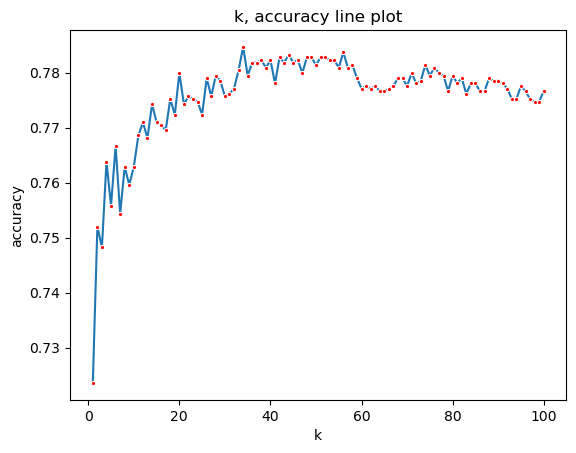

In [53]:
plt.title("k, accuracy line plot")
sns.lineplot(x=range(1, r), y=accuracy_list, marker='o', markersize=3, markerfacecolor='red')


plt.xlabel("k")
plt.ylabel("accuracy");

In [54]:
# 최적의 k일 때 accuracy 값
max(accuracy_list)

0.7846663511594889

In [55]:
# k값은 34
accuracy_list[33]

0.7846663511594889

In [56]:
# 최적의 k값으로 모델 학습 및 평가
knn = KNeighborsClassifier(n_neighbors=34)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7846663511594889

# 중요 변수 파악 : permutation importance

In [58]:
from sklearn.inspection import permutation_importance

In [59]:
%%time
# 1. Permutation Importance 계산
# n_repeats: 각 변수를 몇 번 섞어서 평균을 낼지 결정 (보통 5~10회)
result = permutation_importance(knn, x_test, y_test, n_repeats=5, random_state=100, n_jobs=-1)

# 2. 결과를 데이터프레임으로 정리
# x_train.columns는 학습에 사용된 컬럼명 리스트입니다.
feature_importance = pd.DataFrame({
    'feature': x_train.columns,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values(by='importance_mean', ascending=False)
feature_importance

CPU times: total: 1 s
Wall time: 13.9 s


,feature,importance_mean,importance_std
3,TotalCharges,0.021865,0.004514
10,InternetService_Fiber optic,0.017605,0.001677
1,tenure,0.016280,0.003793
26,PaperlessBilling_Yes,0.009560,0.001704
4,gender_Male,0.009560,0.002862
17,DeviceProtection_Yes,0.008045,0.001719
24,Contract_One year,0.007951,0.001926
13,OnlineSecurity_Yes,0.007099,0.002522
2,MonthlyCharges,0.006436,0.003017
28,PaymentMethod_Electronic check,0.006152,0.002760


In [60]:
# 3. 중요도 상위 10개 출력
print("Top 10 Important Features:")
feature_importance.head(10)

Top 10 Important Features:


,feature,importance_mean,importance_std
3,TotalCharges,0.021865,0.004514
10,InternetService_Fiber optic,0.017605,0.001677
1,tenure,0.016280,0.003793
26,PaperlessBilling_Yes,0.009560,0.001704
4,gender_Male,0.009560,0.002862
17,DeviceProtection_Yes,0.008045,0.001719
24,Contract_One year,0.007951,0.001926
13,OnlineSecurity_Yes,0.007099,0.002522
2,MonthlyCharges,0.006436,0.003017
28,PaymentMethod_Electronic check,0.006152,0.002760


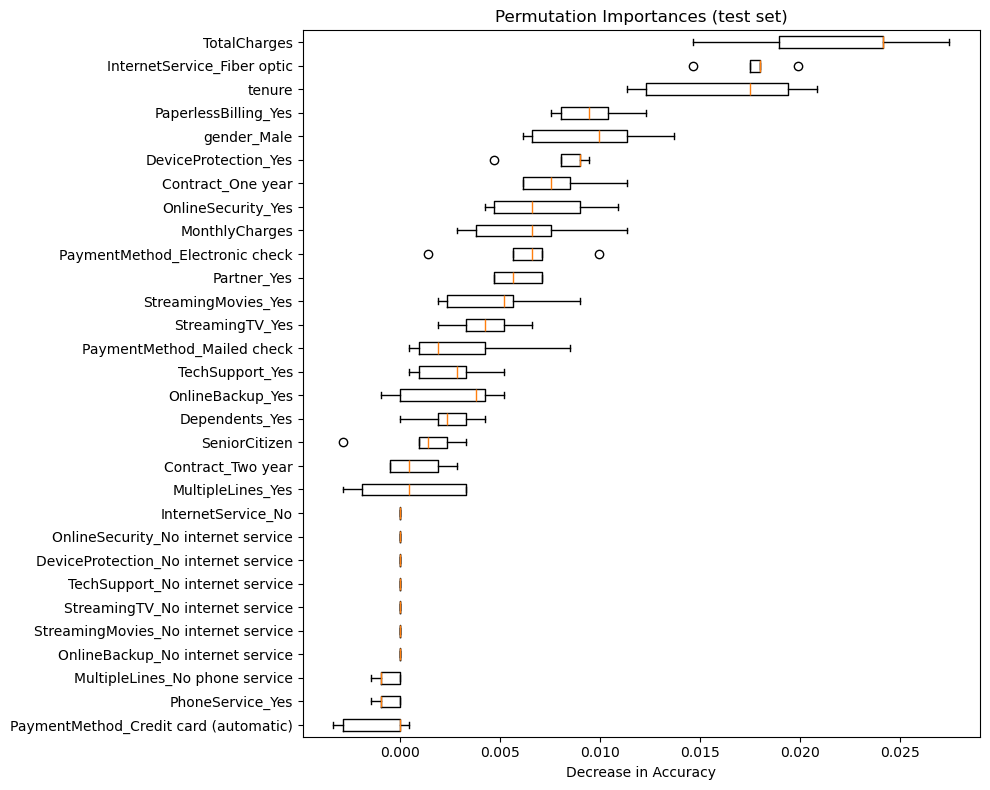

In [61]:
# 4. 시각화 (Boxplot)
plt.figure(figsize=(10, 8))
sorted_idx = result.importances_mean.argsort()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=x_train.columns[sorted_idx])

plt.title("Permutation Importances (test set)")
plt.xlabel("Decrease in Accuracy")
plt.tight_layout()
plt.show()